In [1]:
#calculate position of 0 wind stress line - timeseries off of Amundsen

In [2]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath
import pickle

In [3]:
client = Client(n_workers=8)
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: /proxy/41919/status,
Status: running,Using processes: True
Dashboard: /proxy/41919/status,Workers: 8
Total threads: 8,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:34237,Workers: 8
Dashboard: /proxy/41919/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:34743,Total threads: 1
Dashboard: /proxy/36291/status,Memory: 12.50 GiB
Nanny: tcp://127.0.0.1:37205,


In [4]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

ee = explore.ExperimentExplorer(session=session, experiment='01deg_jra55v140_iaf')
ee

In [5]:
#cc.querying.get_experiments(session)

In [6]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

In [7]:
expt='01deg_jra55v140_iaf'
variable='ht'
ht = cc.querying.getvar('01deg_jra55v140_iaf','ht',session,n=1).sel(yt_ocean=slice(-90,-55))
#ht = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
ht.load()
print(ht.shape)

variable='hu'
hu = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
hu.load()
print(hu.shape)

(584, 3600)
(2700, 3600)


In [8]:
expt='01deg_jra55v140_iaf'
variable='xt_ocean'
xt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xt_ocean.load()
print(xt_ocean.shape)

expt='01deg_jra55v140_iaf'
variable='yt_ocean'
yt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yt_ocean.load()
print(yt_ocean.shape)

variable='area_t'
area_t = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_t.load()
print(area_t.shape)

variable='xu_ocean'
xu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xu_ocean.load()
print(xu_ocean.values)

variable='yu_ocean'
yu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yu_ocean.load()
print(yu_ocean.shape)

variable='area_u'
area_u = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_u.load()
print(area_u.shape)

variable='st_ocean'
st_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
st_ocean.load()
print(st_ocean.shape)

(3600,)
(2700,)
(2700, 3600)
[-280 -280 -280 ...   78   78   79]
(2700,)
(2700, 3600)
(75,)


In [14]:
#txx=[]

tx1=xr.open_dataset('data/taux_01deg_jra55v140_iaf_cycle2_5801to1812.nc',engine='netcdf4',decode_times=False)

tx2=xr.open_dataset('data/taux_01deg_jra55v140_iaf_cycle3_5801to1812.nc',engine='netcdf4',decode_times=False)

#txx=np.asarray(txx)
#print(txx.shape)



In [15]:
tx1

<xarray.Dataset>
Dimensions:   (time: 61, xu_ocean: 3600, yu_ocean: 583)
Coordinates:
  * time      (time) int64 0 365 731 1096 1461 ... 20454 20819 21185 21550 21915
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 ... -55.15 -55.1 -55.04
Data variables:
    tau_x     (time, yu_ocean, xu_ocean) float32 ...

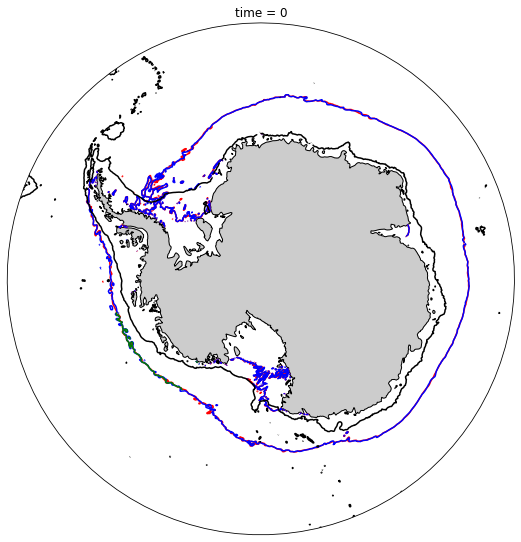

In [29]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(20, 18))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 2, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# isel(st_ocean=(37))

#p1 = ltm_temp1.ltm_temp1.sel(st_ocean=(400),method='nearest').plot.pcolormesh(x='xt_ocean', y='yt_ocean', vmin=271, vmax=278, add_colorbar=False, cmap=plt.cm.seismic, extend='both', transform=ccrs.PlateCarree())
p1 = tx1.tau_x[0].plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='r',linewidth=1,
                       transform=ccrs.PlateCarree())
p2 = tx2.tau_x[0].plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='b',linewidth=1,
                       transform=ccrs.PlateCarree())
p3 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
#                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

a=(tx1.tau_x + tx2.tau_x)/2
p1a = a[0].sel(yu_ocean=slice(-90,-68.5)).sel(xu_ocean=slice(-145,-103)).plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='g',linewidth=1,
                       transform=ccrs.PlateCarree())

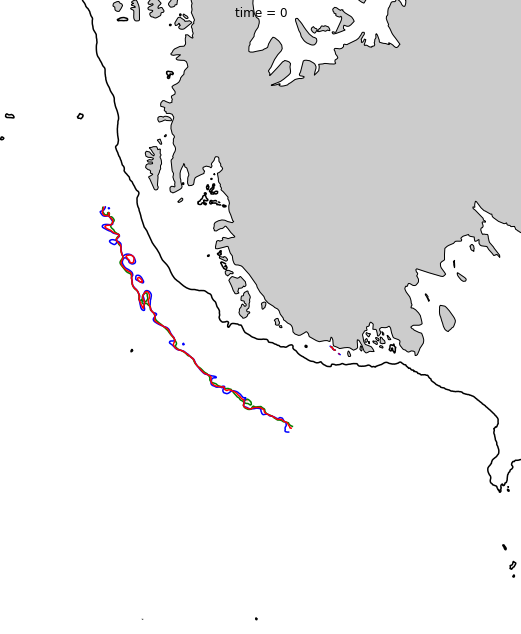

In [34]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(20, 18))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

plt.title('0 Tau_X')

#ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
#cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
#cb.ax.set_xlabel('°C');

ax = plt.subplot(1, 2, 2, projection=projection)

ax.set_extent([-180, -80, -70, -65], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# isel(st_ocean=(37))

p3 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
#                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

#mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-158) & (xt_ocean>-103) )))
p1a = tx1.tau_x[0].sel(yu_ocean=slice(-90,-68.5)).sel(xu_ocean=slice(-145,-103)).plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='g',linewidth=1,
                       transform=ccrs.PlateCarree())
#mb_mask = ht.where(~xr.ufuncs.isfinite(ht.where((ht>1000) & (yt_ocean>-60) & (xt_ocean<-158) & (xt_ocean>-103) )))
p1b = tx2.tau_x[0].sel(yu_ocean=slice(-90,-68.5)).sel(xu_ocean=slice(-145,-103)).plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='b',linewidth=1,
                       transform=ccrs.PlateCarree())

a=(tx1.tau_x + tx2.tau_x)/2
p1c = a[0].sel(yu_ocean=slice(-80,-68.5)).sel(xu_ocean=slice(-145,-103)).plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='r',linewidth=1,
                       transform=ccrs.PlateCarree())



01deg_jra55v140_iaf_cycle2
(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(12, 381, 620)
(1, 381, 620)
ensoant/01deg_jra55v140_iaf_cycle2_Tx0lines_83w.pkl
01deg_jra55v140_iaf_cycle3
(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(60, 381, 620)
(5, 381, 620)
(12, 381, 620)
(1, 381, 620)
ensoant/01deg_jra55v140_iaf_cycle3_Tx0lines_83w.pkl


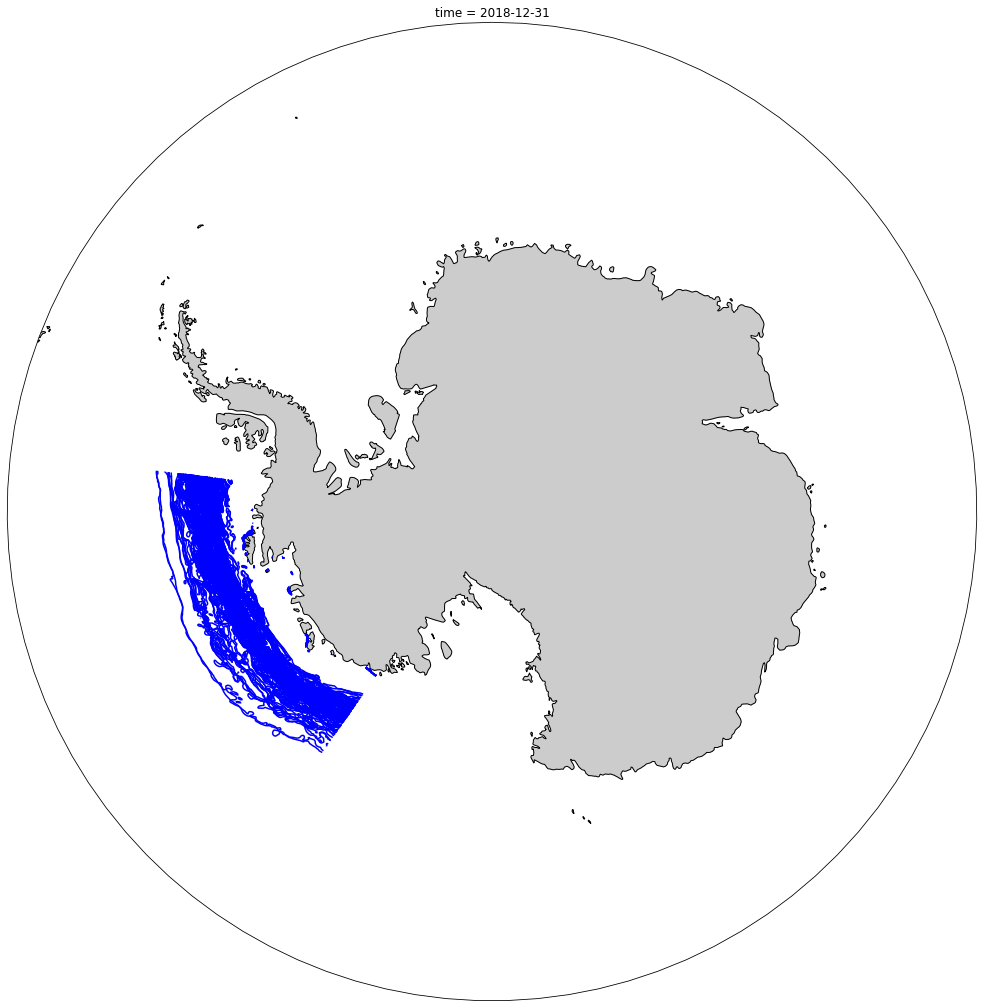

In [50]:
## start = '1958-01-01 00:00:00'
end = '2019-01-01 00:00:00'

expts=['01deg_jra55v140_iaf_cycle2', '01deg_jra55v140_iaf_cycle3']

projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(20, 18))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

for i in expts:
    print(i)
    ds = cc.querying.getvar(i, variable='tau_x', 
                       session=session, frequency='1 monthly',
                       start_time=start, 
                       end_time=end)
    
    all = []
    #cycle thru time chunks 
    for ii, ds_dec in ds.resample({'time':'5YS'}):
        #print(i,ds_dec)
        t=ds_dec.sel(time=slice(start,end)).sel(yu_ocean=slice(-90,-65)).sel(xu_ocean=slice(-145, -83))
        print(t.shape)
        
        #t = t.resample({'time':'QS-Mar'}).mean('time')
        t = t.resample({'time':'Y'}).mean('time')
        print(t.shape)
        
        for iii in t:
            #print(iii)
            p1 = iii.plot.contour(ax=ax,
                       x='xu_ocean', y='yu_ocean', levels=[0], colors='b',linewidth=1,
                       transform=ccrs.PlateCarree())

            pth1 = p1.collections[0].get_paths()
            pth1.sort(key=len,reverse=True)
            v1 = pth1[0].vertices
            x1 = v1[:,0]
            y1 = v1[:,1]

            all.append(v1)
        
    fo='data/'+str(i)+'_Tx0lines_83w.pkl'
    print(fo)
    
    with open(fo, 'wb') as f:
        pickle.dump(all, f)

In [41]:
with open('data/01deg_jra55v140_iaf_cycle2_Tx0lines.pkl', 'rb') as file:    
    # Call load method to deserialze
    all = pickle.load(file)
  
print(len(all))

61


61
61


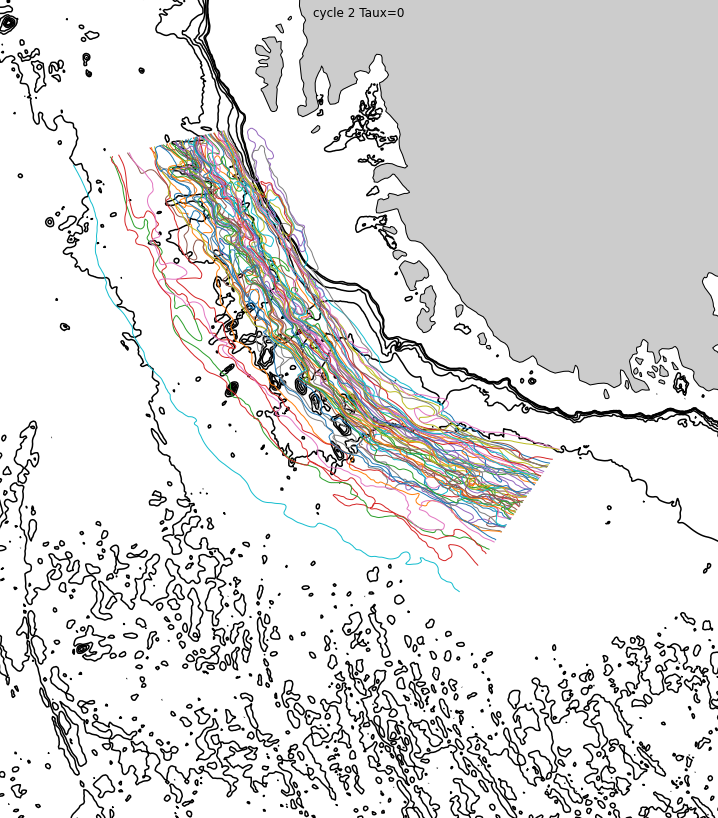

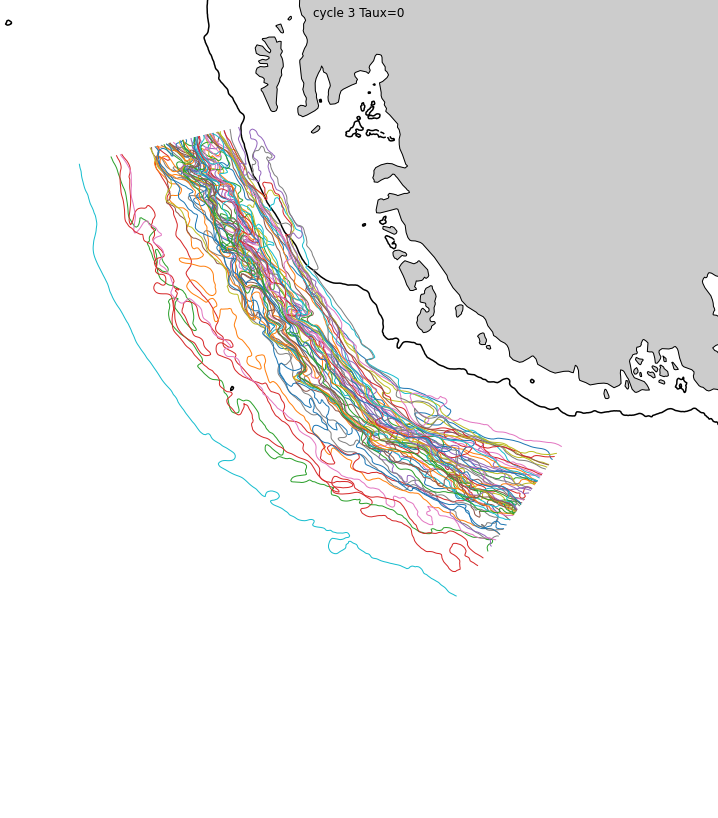

In [42]:
with open('data/01deg_jra55v140_iaf_cycle2_Tx0lines.pkl', 'rb') as file:    
    # Call load method to deserialze
    all = pickle.load(file)
  
print(len(all))
#print(all[0][:,1])

projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(20, 18))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 2, 1, projection=projection)

ax.set_extent([-160, -95, -75, -65], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p3 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())
p3 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=10, colors='k',linewidth=0.5,
                       transform=ccrs.PlateCarree())
yr=1957
for a in all:
    yr+=1
    all[0][:,1]
    ax.plot(a[:,0],a[:,1],'-',linewidth=1,label=yr,transform=ccrs.PlateCarree())

#ax.legend()
plt.title('cycle 2 Taux=0')
plt.tight_layout()

with open('data/01deg_jra55v140_iaf_cycle3_Tx0lines.pkl', 'rb') as file:    
    # Call load method to deserialze
    all = pickle.load(file)
  
print(len(all))
#print(all[0][:,1])

projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(20, 18))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 2, 2, projection=projection)

ax.set_extent([-160, -95, -75, -65], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p3 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

for a in all:
    all[0][:,1]
    ax.plot(a[:,0],a[:,1],'-',linewidth=1,transform=ccrs.PlateCarree())


plt.title('cycle 3 Taux=0')

plt.tight_layout()

In [51]:
aa=np.full((61,2),np.nan)

with open('data/01deg_jra55v140_iaf_cycle2_Tx0lines_83w.pkl', 'rb') as file:    
    # Call load method to deserialze
    all = pickle.load(file)
  
print(len(all))

cnt=-1
for a in all:
    cnt+=1
    aa[cnt,0]=np.mean(a[:,1])
    #print(np.mean(a[:,1]))

with open('data/01deg_jra55v140_iaf_cycle3_Tx0lines_83w.pkl', 'rb') as file:    
    # Call load method to deserialze
    all = pickle.load(file)
  
print(len(all))

cnt=-1
for a in all:
    cnt+=1
    aa[cnt,1]=np.mean(a[:,1])
    #print(np.mean(a[:,1]))

print(aa.shape)

61
61
(61, 2)


In [54]:
np.save('data/01iafTx0_83wlines',aa)

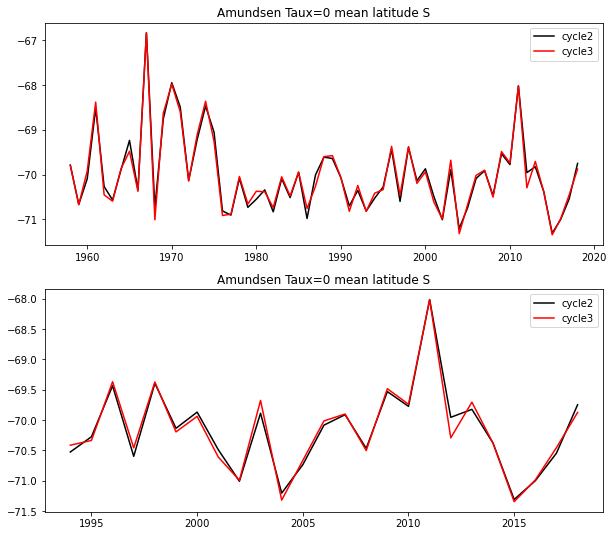

In [55]:
yrs=np.arange(1958,2019)
  
fig = plt.figure(figsize=(10, 9))
ax1=plt.subplot(211)
#aa=np.nans(61,1)
ax1.plot(yrs[:],aa[:,0],linestyle='-',color='k',label='cycle2',linewidth=1.5)
ax1.plot(yrs[:],aa[:,1],linestyle='-',color='r',label='cycle3',linewidth=1.5)

#ax1.plot(yrs[36:],np.zeros((24,1)),linestyle=':',color='k',linewidth=1)
#plt.ylim((-.75,.75))
#ax1.tick_params('y', colors='b')
plt.title('Amundsen Taux=0 mean latitude S')
#ax1.set_xlabel('Years')
ax1.legend(fontsize=10)

myr=36
ax1=plt.subplot(212)
#aa=np.nans(61,1)
ax1.plot(yrs[myr:],aa[myr:,0],linestyle='-',color='k',label='cycle2',linewidth=1.5)
ax1.plot(yrs[myr:],aa[myr:,1],linestyle='-',color='r',label='cycle3',linewidth=1.5)

#ax1.plot(yrs[36:],np.zeros((24,1)),linestyle=':',color='k',linewidth=1)
#plt.ylim((-.75,.75))
#ax1.tick_params('y', colors='b')
plt.title('Amundsen Taux=0 mean latitude S')
#ax1.set_xlabel('Years')
ax1.legend(fontsize=10)